In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

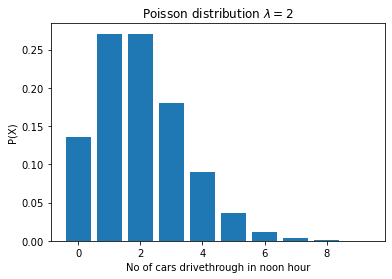

In [10]:
λ = 2  #poisson distr requires only 1 input, lambda

x=np.arange(0,10)  #create a range for our chart
y=stats.poisson(λ).pmf(x)   #pmf function to draw chart: probability for every x in distr (the more xs, the more dedtail)

plt.bar(x,y)
plt.xlabel('No of cars drivethrough in noon hour')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 2$');

### 1.a. What is the probability that no cars drive up in the noon hour?


In [2]:
stats.poisson(λ).pmf(0)

0.1353352832366127

### 1.b.What is the probability that 3 or more cars come through the drive through?

In [6]:
stats.poisson(λ).sf(2)

0.32332358381693654

### 1.c. How likely is it that the drive through gets at least 1 car?

In [9]:
stats.poisson(λ).sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

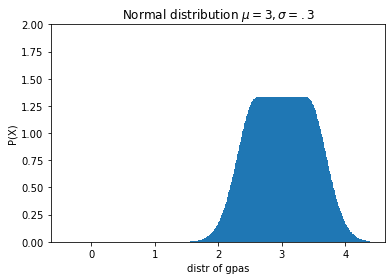

In [31]:
μ = 3
σ = .3

x=np.arange(0,4,.01)  #create a range for our chart. .01 argument created the step
y=stats.norm(μ,σ).pdf(x)   #pdf function to draw chart
plt.ylim(top=2)
plt.bar(x,y)
plt.xlabel('distr of gpas')
plt.ylabel('P(X)')
plt.title('Normal distribution $μ = 3, σ = .3$');

### 2.a. What grade point average is required to be in the top 5% of the graduating class?

In [23]:
μ = 3
σ = .3

gpa = stats.norm(μ,σ)
gpa

In [24]:
gpa.isf(.05)

3.4934560880854417

### 2.b. What GPA constitutes the bottom 15% of the class?

In [25]:
gpa.ppf(.15)

2.689069983151863

### 2.c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [32]:
#aka bottom 30%
#no...actually from 20% to 30%.  whoops

In [144]:
gpa.ppf([.2,.3]) #ppf b/c we are given a %. YOU CAN PASS A RANGE HERE
#2.84 gpa is the cutoff, so yes, they would qualify

array([2.74751363, 2.84267985])

### 2.d. If I have a GPA of 3.5, what percentile am I in?

In [145]:
gpa.cdf(3.5)
#continuous data type, point-specific location...pdf.  still doubting my answer

0.9522096477271853

In [146]:
#by simulation
np.random.normal(3,.3,100_000)

array([2.54219678, 2.94747115, 3.40713893, ..., 3.01278868, 3.2240706 ,
       2.54519865])

In [148]:
(np.random.normal(3,.3,100_000) <3.5).mean()

0.95436

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

<BarContainer object of 100 artists>

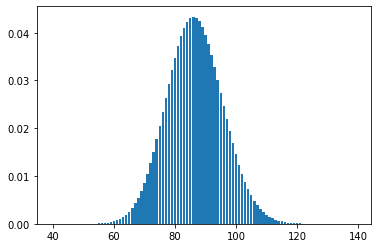

In [127]:
#this is a binomial distr--'yes' or 'no' on clickthrough
p = .02 #prob of success
n_trials = 4326
x = np.arange(40,140)
y = stats.binom(n_trials,p).pmf(x)

plt.bar(x,y)

#ok, work on getting this graph

In [59]:
#this is a binomial distr--'yes' or 'no' on clickthrough
p = .02 #prob of success
n_trials = 4326

clicks = stats.binom(n_trials, p)
clicks

In [69]:
clicks.sf(96)

0.1397582363130086

In [150]:
#simulation
clicks_sim = np.random.choice([0,1],size=(10_000, 4326),p=(.98,.02))
clicks_sim

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
(clicks_sim.sum(axis=1) >= 97).mean()

0.1385

In [152]:
#using poisson approx:

In [153]:
λ = n_trials* p

In [154]:
stats.poisson(λ).sf(96)

0.14211867659283192

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [63]:
#this is binomial info: number of trials and probability of success

p = .01
n_trials = 60

homework = stats.binom(n_trials, p)
homework

In [65]:
homework.sf(0)

0.4528433576092388

In [156]:
#simulation
(np.random.choice([0,1],size = (100_000, 60), p =(.99,.01)).sum(axis=1)>0).mean()

0.45367

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

### 5.a. How likely is it that the break area gets cleaned up each day? 

In [158]:
#binomial bc it's 'success' vs 'failure'...

n_trials = 22 * .9 * 3
p = .03

clean = stats.binom(n_trials,p)
clean

Text(0.5, 0, 'number of times area is cleaned per day')

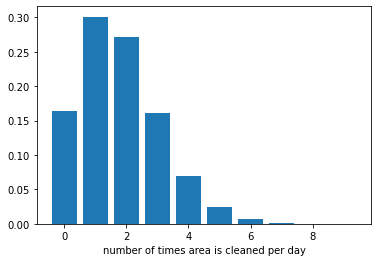

In [159]:
x=np.arange(0,10)
y=stats.binom(n_trials,p).pmf(x)
plt.bar(x,y)
plt.xlabel('number of times area is cleaned per day')

In [160]:
clean.sf(0)
#sf bc we're looking for success for above 0

0.8342199288437355

### 5.b. How likely is it that it goes two days without getting cleaned up? All week?

In [161]:
n_trials = 22 * .9 * 3 *2
p = .03

stats.binom(n_trials,p).pmf(0)
#pmf bc we are looking to see if exactly 0 clean it

0.026821436301629083

In [96]:
n_trials = 22 * .9 * 3 * 5
p = .03

stats.binom(n_trials, p).pmf(0)

0.00011781621791055166

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [164]:
#normal distr
μ = 15 * 2 #number of people times time to order
σ = 3 * 2 #the std_dev of people times order time

time_to_order = 2
time_for_serv = 10

lunch = stats.norm(μ, σ)
lunch

In [165]:
lunch.cdf(33)
#cdf for likelihood below 45 minutes, but add 10 minutes to the wait and 2 minutes for your own order time

0.6914624612740131

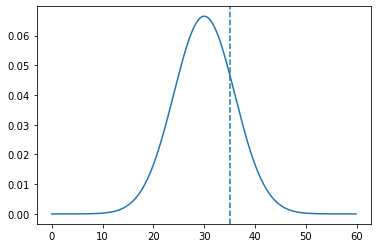

In [166]:
x=np.arange(0,60,.1)
y=stats.norm(μ,σ).pdf(x)

plt.plot(x,y)
plt.axvline(35,ls='--')

In [167]:
#simulation
np.random.normal(30,6,)

28.262247515069948

In [168]:
(np.random.normal(30,6,100_000) <= 33).mean()

0.69337

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [121]:
from get_db_url import get_db_url
#imported my get database url function

In [171]:
sql = """
    SELECT * from salaries
    WHERE to_date = NOW
"""
#write some sql to get the data i need

In [172]:
url = get_db_url('employees')
salaries_df = pd.read_sql(sql,url)
salaries_df.head()
#read the sql into python

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [130]:
salaries_df = pd.DataFrame(salaries_df)
salaries_df.head()
#convert the table into a pandas dataframe

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [131]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [133]:
#find the average salary of current employees, along with the standard deviation
avg_sal = salaries_df.salary.mean()
avg_sal

63810.744836143705

In [135]:
salary_stddev = salaries_df.salary.std()
salary_stddev

16904.831259952276

In [136]:
μ = avg_sal
σ = salary_stddev

salary_stats = stats.norm(μ,σ)
salary_stats


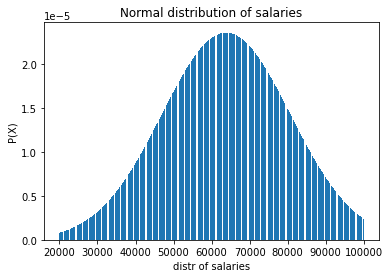

In [137]:
μ = avg_sal
σ = salary_stddev

x=np.arange(20_000,100_000)  #create a range for our chart
y=stats.norm(μ,σ).pdf(x)   #pdf function to draw chart
#plt.ylim(top=2)
plt.bar(x,y)
plt.xlabel('distr of salaries')
plt.ylabel('P(X)')
plt.title('Normal distribution of salaries');

### 7.a. What percent of employees earn less than 60,000?

In [138]:
salary_stats.cdf(60_000)

0.41082494791346336

### 7.b. What percent of employees earn more than 95,000?

In [139]:
salary_stats.sf(95_000)

0.03252375415623144

### 7.c. What percent of employees earn between 65,000 and 80,000?

In [142]:
salary_stats.cdf(80_000)-salary_stats.cdf(65_000)

0.30284302293987486

In [ ]:
#ravinder code.  make sure it runs
np.dff(stats.norm(mean,stddev).cdf([65000,80000]))

### 7.d. What do the top 5% of employees make?

In [141]:
salary_stats.isf(.05)

91616.71784707883

In [ ]:
#are the salaries really normally distributd
salaries.salary.hist(bins=30)